<a href="https://colab.research.google.com/github/carolina-garay/M_Espacios_Verdes_2022_Grupo1/blob/Seba-Ormaechea/TPCurac_SGO_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Exploración y Curación de Datos 

En esta etapa ya hemos avanzado en (basados en el [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)):

- análisis y exploración del conjunto de datos (aunque sea superficialmente)
- set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
- inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.

- etc

En lo que sigue vamos a aplicar mucho de lo obtenido en el TP anterior para "curar" nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Las recetas pasaran de las mas simples, hasta algunas mas elaboradas. Una de las intenciones de todo proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos (puesto que la recoleccion de los mismos, etc, suele ser un proceso costoso tanto en recursos como en tiempo, entre otras cosas).

### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

Para una introducción un poco mas extensa respecto al origen de los datos y su procesamiento se pueden referir a :
- [ab-initio-data-build](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md)
- [ab-initio-analisis-visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-analisis-visualizacion.md)


## Sobre el Trabajo Requerido

Se propone la elaboración de un conjunto de procedimientos (\*.py o notebooks) que nos permitan partiendo del dataset original obtener uno nuevo y "curado".
Respecto a las recetas mencionadas, son las que van a dar origen a los distintos procedimientos y nos van a permitir inferir (ya en el proximo TP) la importancia del proceso de curación.

### Sobre las recetas

La idea de construccion de una receta es que pueda ser aprovechada cuando le llegue un set nuevo de datos. Tanto  para su transformacion para incorporarlos al set de entramiento como para su posible uso en inferencia.

__DISCLAIMER__: En lo siguiente vamos a presentar un numero limitado (~4) de recetas (para el problema en cuestión).

### ab-initio

- elija (basados en lo aprendido en el TP anterior) un conjunto de bandas e indices que considere representativo. Adicione a su elección:
    - raster: raster del cual se extraen los estadísticos
    - clouds_on_raster: nubosidad del raster completo
    - osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
    - area_m2: area en metros cuadrados
    - date: fecha de la muestra.
    
    estas variables las sumamos a los efectos practicos de representacion y filtrado.



### [A] Esfuerzo Nulo

- Leer los datos

In [1]:
# Setup necesario para correr pandas profiling
#!pip install pandas_profiling==2.8.0
#!pip install pandas==1.2.0
########################################
# Importación necesaria para correr pandas profiling y descargar reporte
#from pandas_profiling import ProfileReport
##from google.colab import files
########################################
# Descarga de base de datos
# from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
########################################
#!pip install gdown
#pip install missingno

In [2]:
# Descarga de archivo
#!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

In [3]:
import pandas as pd
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    df_=pd.read_csv('../data/cba/espacios-verdes-indexs-cba-20170101-20220420.csv',index_col=0)

Running on CoLab
Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:00<00:00, 206MB/s]


In [4]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib
import datetime

# Lectura de csv y obtención de dataframe 
#df_=pd.read_csv(r"C:\Users\Sebastian\Documents\buckup 20-4-2021\4- Data Science\Diplo FAMAF\Espacios verdes\espacios-verdes-indexs-cba-20170101-20220420.zip", index_col=0)
#df_

In [5]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208932 entries, 0 to 208931
Columns: 167 entries, B02_min to date
dtypes: float64(140), int64(24), object(3)
memory usage: 267.8+ MB


- Extraer las columnas de interes (## ab-initio)

In [6]:
# Creamos un nuevo dataframe con las columnas de interés 
df_interest_A1 = df_[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest_A1)

208932

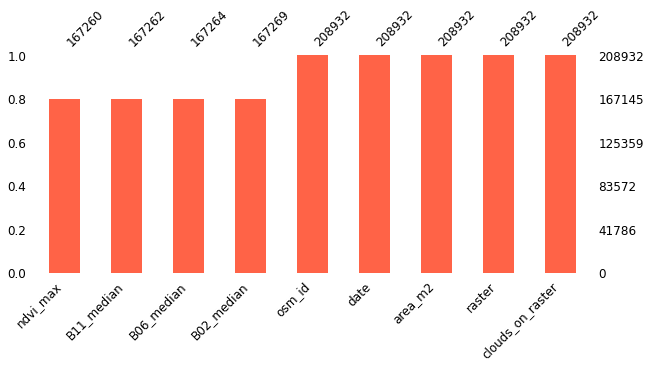

In [7]:
# Utilizamos la librería missingno para el análisis de datos faltantes 
import missingno as msno
# Graficamos los datos faltantes de varias variables, incluidas las de interés
msno.bar(df_interest_A1,figsize=(10, 4), sort="ascending",fontsize=12, color='tomato') 

- Desechar valores nulos

In [8]:
# Desechamos valores nulos de las columnas de interés y generamos nuevo dataframe 
df_interest_A2=df_interest_A1.dropna(subset=["B02_median","B06_median","B11_median"])

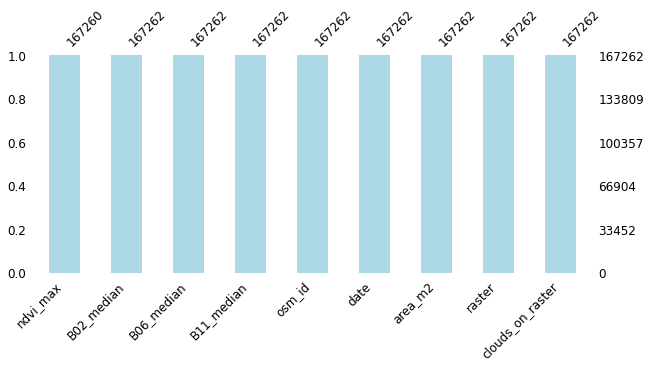

In [9]:
# Graficamos nuevamente y observamos que ya no hay presentes valores nulos
msno.bar(df_interest_A2,figsize=(10, 4), sort="ascending",fontsize=12, color='lightblue') 

- Filtrar por nubosidad < 10%

In [10]:
# Filtramos por nubosidad < 10% y creamos nuevo dataframe
print(df_interest_A1.clouds_on_raster.value_counts())

df_interest_A3=df_interest_A2[df_interest_A2['clouds_on_raster']<0.1]
len(df_interest_A3)

0.000000      112036
100.000000     10598
0.949876         757
71.800745        757
98.263644        757
               ...  
7.396293         757
1.664029         757
28.489752        757
36.671820        757
30.789672        757
Name: clouds_on_raster, Length: 116, dtype: int64


114424

- Remocion de Outliers (a nivel general sin considerar estacionalidad)

Para remover outliers, primero definimos una función que genere nuevas columnas que diferencien outliers (valor=1), del resto de los registros (valor=0).
Luego, para la eliminación de outliers, aplicamos el criterio de quitar aquellos registros donde se observa que para las tres bandas bajo análisis (columnas), los valores son outliers (valor=1).  

In [11]:
def find_outliers(df, col_list):
    # calculamos cuartiles 1 y 3, y el interquartil (iqr)
    for col in col_list:
        if col=="NaN":
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1 
        # calculamos límite superior e inferior
        ls = q1 + 1.5 * iqr
        li = q3 - 1.5 * iqr
        # Generamos nueva columna
        df['outl_'+col]=  np.where((df[col] >ls)| (df[col] < li),1,0)

In [12]:
bandas = ['B02_median', 'B06_median', 'B11_median']
find_outliers(df_interest_A3, bandas)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [13]:
df_interest_A3

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,outl_B02_median,outl_B06_median,outl_B11_median
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,0,0
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,1,0
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0,0
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,1,0
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0


In [14]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis, los valores son outliers
df_interest_A4 = df_interest_A3[~((df_interest_A3['outl_B02_median']==1) & (df_interest_A3['outl_B06_median']==1) & (df_interest_A3['outl_B11_median']==1))]
len(df_interest_A4)

112391

- Grabar los datos transformados

In [15]:
# Aquí está faltando el paso de grabar los resultados

### Receta [B] Imputacion General + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [18]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_B1 = df_interest_A1.copy()
len(df_interest_B1)

208932

- Remoción de Outliers (a nivel general sin considerar estacionalidad)

In [19]:
# Aplicamos la función desarrollada anteriormente
find_outliers(df_interest_B1, bandas)
# Removemos outliers
df_interest_B2 = df_interest_B1[~((df_interest_B1['outl_B02_median']==1) & (df_interest_B1['outl_B06_median']==1) & (df_interest_B1['outl_B11_median']==1))]
len(df_interest_B2)

200681

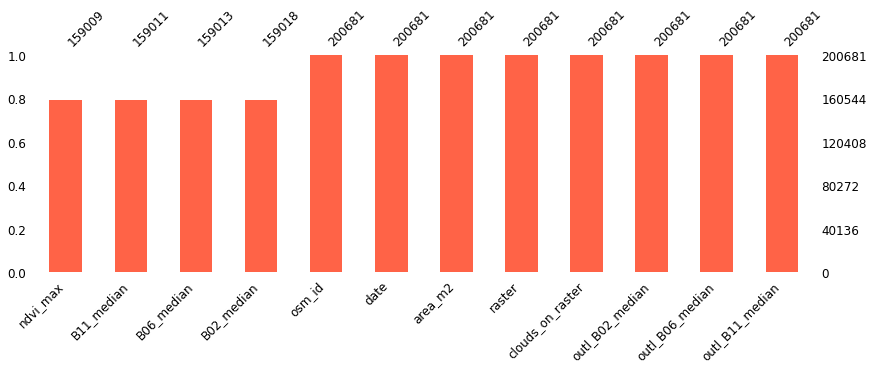

In [20]:
# Analizamos si hay valores nulos con la siguiente gráfica
msno.bar(df_interest_B2,figsize=(14, 4), sort="ascending",fontsize=12, color='tomato')

- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)

La elección del método de imputación, requiere del conocimiento de la naturaleza del problema de los datos que faltan en el dataset a imputar. Como vimos en el práctico pasado, es posible que la falta de registros en este dataset sea debido a un error no aleatorio correspondiente a características no observadas. Esto acota la disponibilidad de métodos de imputación. Podríamos considerar el uso de técnicas como KNN (vecino más cercano). Sin embargo, para la imputación de valores faltantes en una variable dada, KNN define con mayor precisión los vecinos cercanos si se utilizan variables de soporte que contengan datos para el mismo registro donde faltan datos en la variable dada. En el caso de este dataset, lamentablemente, los registros que faltan para una variable, son los mismos que para las otras, impidiendo una estimación adecuada por KNN. Esto puede verse claramente en la siguiente gráfica.   

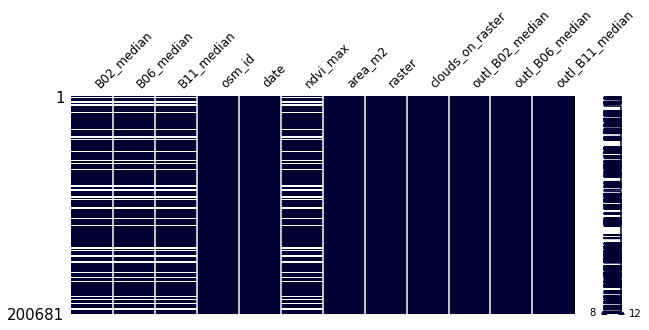

In [21]:
msno.matrix(df_interest_B2,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

Por otra parte, dado que los datos corresponden a una serie temporal, podemos considerar el uso de métodos como Forward fill, Back fill e Interpolación lineal. Para ello, verificamos primero que los valores faltantes no estén agrupados en el mismo período temporal, ya que generaría una pobre estimación de valores faltantes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


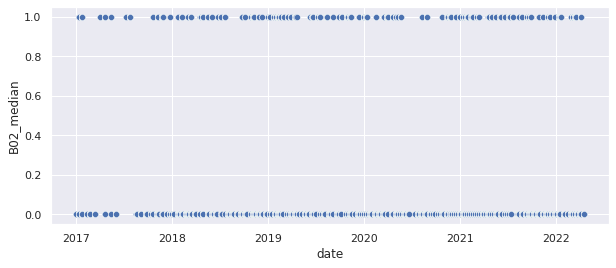

In [22]:
import seaborn as sns
df_interest_B2['date']= pd.to_datetime(df_interest_B2['date'])
sns.set(rc = {'figure.figsize':(10,4)})
sns.scatterplot(x=df_interest_B2["date"], y=df_interest_B2["B02_median"].isnull())

Los valores faltantes se ubican a lo largo de toda la serie temporal, por lo que podemos utilizar Forward fill, Back fill o Interpolación lineal. Podríamos seleccionar cualquiera ya que no tenemos elementos de juicio para definir cual de los tres podría tener mejor performance sobre este dataset. Sin embargo, una opción interesante es combinar Forward fill y Back fill.

200681


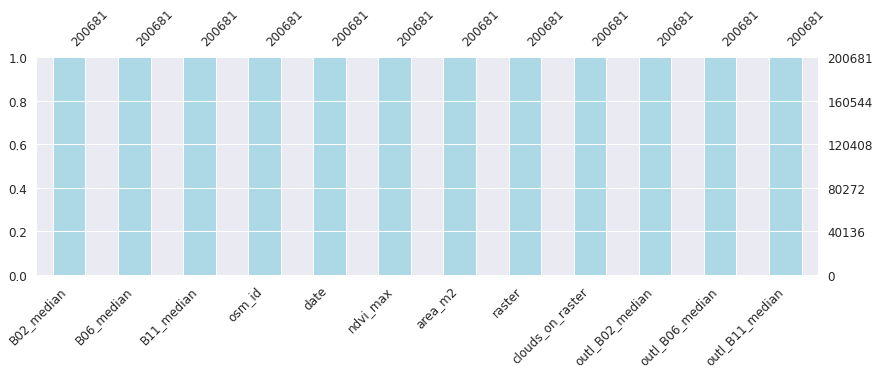

In [23]:
# Imputamos valores nulos bajo el criterio del vecino más cercano
df_interest_B3 = df_interest_B2.copy()

df_interest_B3 = df_interest_B3.fillna(method='ffill').fillna(method='bfill')
print(len(df_interest_B3))
msno.bar(df_interest_B3,figsize=(14, 4), sort="ascending",fontsize=12, color='lightblue')

- Filtrar por nubosidad < 10%

In [24]:
# Filtrar por nubosidad < 10%
df_interest_B4=df_interest_B3[df_interest_B3['clouds_on_raster']<0.1]
len(df_interest_B4)

114497

- Grabar los datos transformados

In [25]:
# Aquí está faltando el paso de grabar los resultados

### Receta [C] Imputacion Estacional + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [27]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_C1 = df_interest_A1.copy()
len(df_interest_C1)

208932

- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [28]:
# Para la remoción de outliers por estación, defiinimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_C1['date']= pd.to_datetime(df_interest_C1['date'])

# Extraemos el mes de cada registro.
df_interest_C1['month'] = df_interest_C1['date'].dt.month

# Aplicamos la siguiente función para determinar la estación a la que corresponde cada registro.
def seasons(df, col):
    Seasons = []
    for month in df[col]:
        if month in (1, 2, 3):
            season = 'summer'
        elif month in (4, 5, 6):
            season = 'autumn'
        elif month in (7, 8, 9):
            season = 'winter'
        else:
            season = 'spring'
        Seasons.append(season)
    df["season"]= Seasons

seasons(df_interest_C1, "month")
df_interest_C1

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn


In [29]:
# Generamos nuevas columnas de cada banda para cada estación
df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B02_summer'] = df_interest_C1['B02_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B02_autumn'] = df_interest_C1['B02_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B02_winter'] = df_interest_C1['B02_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B02_spring'] = df_interest_C1['B02_median']

df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B06_summer'] = df_interest_C1['B06_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B06_autumn'] = df_interest_C1['B06_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B06_winter'] = df_interest_C1['B06_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B06_spring'] = df_interest_C1['B06_median']

df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B11_summer'] = df_interest_C1['B11_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B11_autumn'] = df_interest_C1['B11_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B11_winter'] = df_interest_C1['B11_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B11_spring'] = df_interest_C1['B11_median']

In [30]:
# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

# Aplicamos la función de detección de outliers
find_outliers(df_interest_C1, Season_values)

In [31]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_C2_summer = df_interest_C1[~((df_interest_C1['outl_B02_summer']==1) & (df_interest_C1['outl_B06_summer']==1) & 
                        (df_interest_C1['outl_B11_summer']==1))]
print(len(df_interest_C2_summer))

df_interest_C2_autumn = df_interest_C2_summer[~((df_interest_C1['outl_B02_autumn']==1) & 
                        (df_interest_C2_summer['outl_B06_autumn']==1) & (df_interest_C2_summer['outl_B11_autumn']==1))]
print(len(df_interest_C2_autumn))

df_interest_C2_winter = df_interest_C2_autumn[~((df_interest_C1['outl_B02_winter']==1) & 
                        (df_interest_C2_autumn['outl_B06_winter']==1) & (df_interest_C2_autumn['outl_B11_winter']==1))]
print(len(df_interest_C2_winter))

df_interest_C2_spring = df_interest_C2_winter[~((df_interest_C1['outl_B02_spring']==1) & 
                        (df_interest_C2_winter['outl_B06_spring']==1) & (df_interest_C2_winter['outl_B11_spring']==1))]
print(len(df_interest_C2_spring))

205669
202722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


200130
197680


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


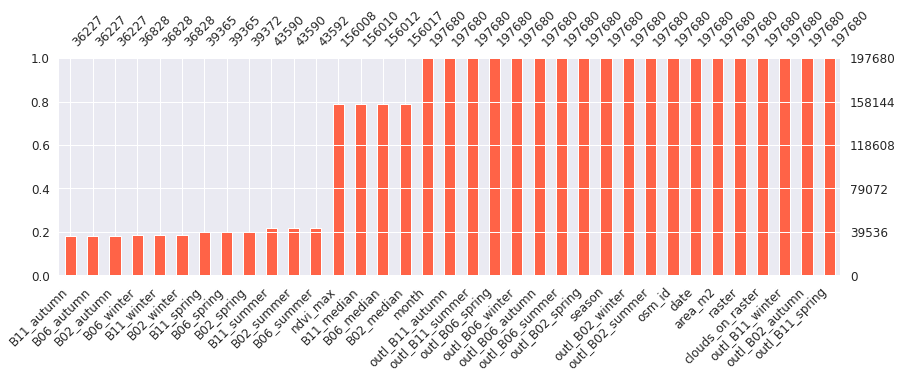

In [32]:
msno.bar(df_interest_C2_spring,figsize=(14, 4), sort="ascending",fontsize=12, color='tomato')

- Imputar valores nulos (a nivel estacional - definir el criterio, o estadistico, _media_, _mediana_, etc)

In [33]:
# Dividimos el conjunto de datos por estación
df_interest_summer = df_interest_C2_spring[df_interest_C2_spring['season']=="summer"]
df_interest_autumn = df_interest_C2_spring[df_interest_C2_spring['season']=="autumn"]
df_interest_winter = df_interest_C2_spring[df_interest_C2_spring['season']=="winter"]
df_interest_spring = df_interest_C2_spring[df_interest_C2_spring['season']=="spring"]

In [34]:
# Imputamos valores nulos a nivel estacional bajo Forward fill y Backward fill combinados
vars_imput = ["B02_median","B06_median","B11_median", "ndvi_max"]

df_interest_summer[vars_imput]=df_interest_summer[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_autumn[vars_imput]=df_interest_autumn[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_winter[vars_imput]=df_interest_winter[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_spring[vars_imput]=df_interest_spring[vars_imput].fillna(method='ffill').fillna(method='bfill')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


197680


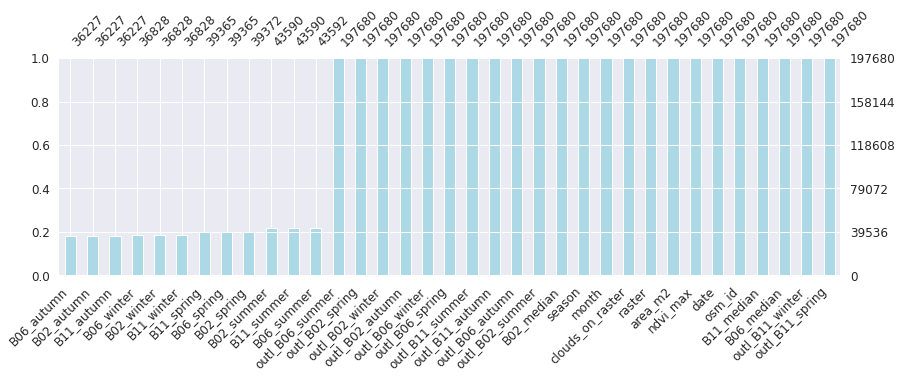

In [35]:
# Volvemos a unir los subconjuntos estacionales en un mismo dataframe
df_interest_C2 = pd.concat([df_interest_summer, df_interest_autumn, df_interest_winter, df_interest_spring], ignore_index=True)
print(len(df_interest_C2))
msno.bar(df_interest_C2,figsize=(14, 4), sort="ascending",fontsize=12, color='lightblue')

- Filtrar por nubosidad:
    - < 20%
    - < 40%

In [38]:
# Filtramos por nubosidad < 20% y luego < 40%
df_interest_C3 = df_interest_C2[df_interest_C2['clouds_on_raster']<0.2]
print(len(df_interest_C3))
df_interest_C4 = df_interest_C2[df_interest_C2['clouds_on_raster']<0.4]
print(len(df_interest_C4))


115009
117969


- Grabar los datos transformados

In [39]:
# Aquí está faltando el paso de grabar los resultados

### Receta [D] Imputacion Estacional + Filtrado Por Nubosidad + Normalizacion 

__NOTA__: Para ciertos algoritmos puede ser necesario normalizar los datos (para facilitar su convergencia). Se le ocurre alguna forma de hacerlo? (Existen muchas alternativas, elija alguna de ellas - justificando su eleccion). Utilizando alguna que le parezca interesante, actualice la siguiente receta basada en [C]

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [41]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_D1 = df_interest_A1.copy()
len(df_interest_D1)

208932

- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [42]:
# Para la remoción de outliers por estación, defiinimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_D1['date']= pd.to_datetime(df_interest_D1['date'])

# Extraemos el mes de cada registro.
df_interest_D1['month'] = df_interest_D1['date'].dt.month

# Aplicamos la función (seasons)creada anteriormente para determinar la estación a la que corresponde cada registro.
seasons(df_interest_D1, "month")

# Generamos nuevas columnas de cada banda para cada estación
df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B02_summer'] = df_interest_D1['B02_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B02_autumn'] = df_interest_D1['B02_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B02_winter'] = df_interest_D1['B02_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B02_spring'] = df_interest_D1['B02_median']

df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B06_summer'] = df_interest_D1['B06_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B06_autumn'] = df_interest_D1['B06_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B06_winter'] = df_interest_D1['B06_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B06_spring'] = df_interest_D1['B06_median']

df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B11_summer'] = df_interest_D1['B11_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B11_autumn'] = df_interest_D1['B11_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B11_winter'] = df_interest_D1['B11_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B11_spring'] = df_interest_D1['B11_median']

# Aplicamos la función de detección de outliers utilizando la lista ya creada de columnas de interés (Season_values)
find_outliers(df_interest_D1, Season_values)

# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_D2_summer = df_interest_D1[~((df_interest_D1['outl_B02_summer']==1) & (df_interest_D1['outl_B06_summer']==1) & 
                        (df_interest_D1['outl_B11_summer']==1))]
print(len(df_interest_D2_summer))

df_interest_D2_autumn = df_interest_D2_summer[~((df_interest_D1['outl_B02_autumn']==1) & 
                        (df_interest_D2_summer['outl_B06_autumn']==1) & (df_interest_D2_summer['outl_B11_autumn']==1))]
print(len(df_interest_D2_autumn))

df_interest_D2_winter = df_interest_D2_autumn[~((df_interest_D1['outl_B02_winter']==1) & 
                        (df_interest_D2_autumn['outl_B06_winter']==1) & (df_interest_D2_autumn['outl_B11_winter']==1))]
print(len(df_interest_D2_winter))

df_interest_D2_spring = df_interest_D2_winter[~((df_interest_D1['outl_B02_spring']==1) & 
                        (df_interest_D2_winter['outl_B06_spring']==1) & (df_interest_D2_winter['outl_B11_spring']==1))]
print(len(df_interest_D2_spring))

205669
202722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


200130
197680


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)

In [43]:
# Dividimos el conjunto de datos por estación
df_interest_summer = df_interest_D2_spring[df_interest_D2_spring['season']=="summer"]
df_interest_autumn = df_interest_D2_spring[df_interest_D2_spring['season']=="autumn"]
df_interest_winter = df_interest_D2_spring[df_interest_D2_spring['season']=="winter"]
df_interest_spring = df_interest_D2_spring[df_interest_D2_spring['season']=="spring"]

In [44]:
# Imputamos valores nulos a nivel estacional bajo Forward fill y Backward fill combinados
vars_imput = ["B02_median","B06_median","B11_median", "ndvi_max"]

df_interest_summer[vars_imput]=df_interest_summer[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_autumn[vars_imput]=df_interest_autumn[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_winter[vars_imput]=df_interest_winter[vars_imput].fillna(method='ffill').fillna(method='bfill')
df_interest_spring[vars_imput]=df_interest_spring[vars_imput].fillna(method='ffill').fillna(method='bfill')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


197680


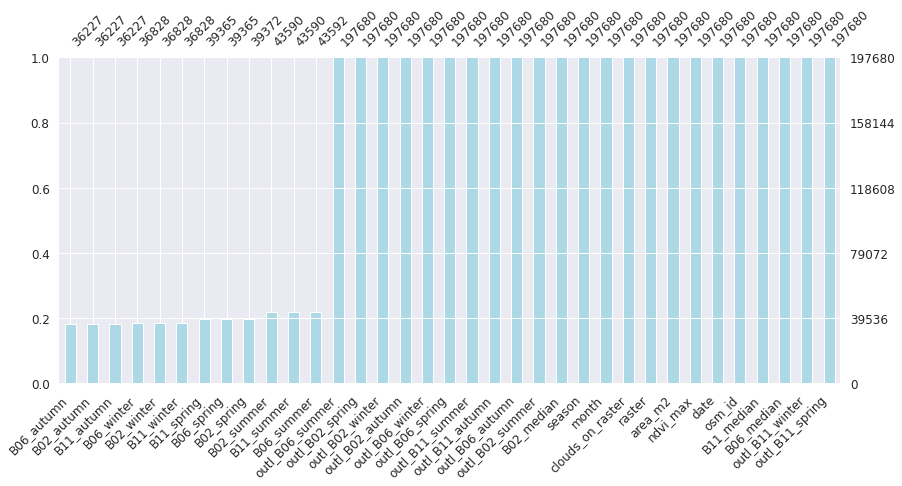

In [45]:
# Volvemos a unir los subconjuntos estacionales en un mismo dataframe
df_interest_D2 = pd.concat([df_interest_summer, df_interest_autumn, df_interest_winter, df_interest_spring], ignore_index=True)
print(len(df_interest_D2))
msno.bar(df_interest_D2,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

- Filtrar por nubosidad:
    - < 40%

In [46]:
# Filtramos por nubosidad < 40%
df_interest_D3 = df_interest_D2[df_interest_D2['clouds_on_raster']<0.4]
print(len(df_interest_D3))

117969


- __NORMALIZACION__

In [49]:
# Aplicamos una estandarización de tipo Min Max Scaler. Este transforma las características escalándolas a un rango dado, por defecto (0,1).
# Este tipo de escalado suele denominarse frecuentemente "normalización"

from sklearn.preprocessing import MinMaxScaler
estandarizador = MinMaxScaler()
estandarizador.fit(df_interest_D3[vars_imput])
df_interest_D3.loc[:, vars_imput] = estandarizador.transform(df_interest_D3[vars_imput])
len(df_interest_D3)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


117969

- Grabar los datos transformados

In [50]:
# Aquí está faltando el paso de grabar los resultados

## Sugerencia

Considere cada paso de la receta como una función. Es decir al finalizar una receta tendra tantas funciones como pasos. Esto le va a permitir reordenar y reutilizar las mismas sin necesidad de reescribir ningun codigo extra. Esto le sera particularmente util para una de las preguntas de la siguiente sección.


## Recetas + Comparativa

Una vez generadas las recetas se debera generar una suerte de tabla comparativa entre las mismas, poniendo de relevancia la cantidad de datos desechados/recuperados en cada instancia. _Note que todos las recetas tienen un mismo eje_.

¿Cual es su percepcion de como resultaran cada una de las recetas en un algoritmo de aprendizaje?

¿Que pasa si en la receta [C] o [D] primero filtra por nubosidad y despues remueve outliers? Considere esto como variante y definalo como [C-1] y [C-2] ([D-1]/[D-2]).

        Receta A  Receta B  Receta C  Receta D
Paso 1    208932    208932    208932    208932
Paso 2    167262    200681    197680    197680
Paso 3    114424    200681    115009    117969
Paso 4    112391    114497    117969    117969


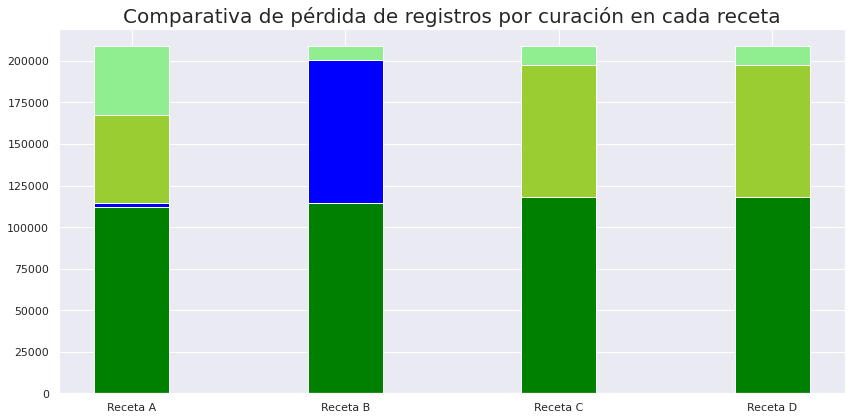

In [53]:
# Tabla comparativa
import matplotlib.pyplot as plt

P1A = len(df_interest_A1)
P1B = len(df_interest_A2)
P1C = len(df_interest_A3)
P1D = len(df_interest_A4)
P2A = len(df_interest_B1)
P2B = len(df_interest_B2)
P2C = len(df_interest_B3)
P2D = len(df_interest_B4) 
P3A = len(df_interest_C1)
P3B = len(df_interest_C2)
P3C = len(df_interest_C3)
P3D = len(df_interest_C4)
P4A = len(df_interest_D1)
P4B = len(df_interest_D2)
P4C = len(df_interest_D3)
P4D = len(df_interest_D3) # No hay 4to paso

data= [[P1A,P2A,P3A,P4A], [P1B,P2B,P3B,P4B], [P1C,P2C,P3C,P4C],
        [P1D,P2D,P3D,P4D]]
columns = ('Receta A', 'Receta B', 'Receta C', 'Receta D')
rows= ('Paso 1', 'Paso 2', 'Paso 3', 'Paso 4')

TABLA = pd.DataFrame(data, rows, columns)
print(TABLA)

#########################################################################################   

a = [P1A,P2A,P3A,P4A]
b = [P1B,P2B,P3B,P4B]
c = [P1C,P2C,P3C,P4C]
d = [P1D,P2D,P3D,P4D]
ind = np.arange(len(a))

fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
ax.bar(x=ind, height=a, width=0.35,  align='center', color="lightgreen")
ax.bar(x=ind, height=b, width=0.35,  align='center', color="yellowgreen")
ax.bar(x=ind, height=c, width=0.35,  align='center', color="blue")
ax.bar(x=ind, height=d, width=0.35,  align='center', color="green")
ax.set_title('Comparativa de pérdida de registros por curación en cada receta', fontsize=20)

labels= ['Receta A', 'Receta B', 'Receta C', 'Receta D']
plt.xticks(ind, labels)

plt.tight_layout()
plt.show()

In [54]:
# Percepción de como resultaran cada una de las recetas en un algoritmo de aprendizaje

# Respuesta a ¿Qué pasa si en la receta [C] o [D] primero filtra por nubosidad y después remueve outliers?

## __Extra__

Generar alguna receta alternativa, basada en las propuestas mencionadas (o alguna completamente diferente :-) ).

In [55]:
# Desarrollar aquí receta alternativa

In [ ]:
import pandas as pd  

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    df_=pd.read_csv('../data/cba/espacios-verdes-indexs-cba-20170101-20220420.csv',index_col=0)

In [57]:
""" Aplicamos el siguiente código para determinar la estación a la que corresponde cada registro.
Seasons = []
for month in df_interest_C1['month']:
    if month in (1, 2, 3):
        season = 'summer'
    elif month in (4, 5, 6):
        season = 'autumn'
    elif month in (7, 8, 9):
        season = 'winter'
    else:
        season = 'spring'
    Seasons.append(season)

df_interest_C1['season']= Seasons """

" Aplicamos el siguiente código para determinar la estación a la que corresponde cada registro.\nSeasons = []\nfor month in df_interest_C1['month']:\n    if month in (1, 2, 3):\n        season = 'summer'\n    elif month in (4, 5, 6):\n        season = 'autumn'\n    elif month in (7, 8, 9):\n        season = 'winter'\n    else:\n        season = 'spring'\n    Seasons.append(season)\n\ndf_interest_C1['season']= Seasons "